In [1]:
# %% Imports
from utils import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap

In [2]:

# %% Load and preprocess data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(7778, 21)
(1022, 21)


In [3]:
# %% Fit blackbox model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5322285353535354
Accuracy 0.9432485322896281


In [4]:
# %% Create SHAP explainer
explainer = shap.TreeExplainer(rf)
# Calculate shapley values for test data
start_index = 5
end_index = 9
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
3096,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,13,0,0,76,29
484,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,48,0,0,132,31
2908,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,69,0,0,92,27
3262,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,47,0,0,88,22


In [5]:
# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

(21, 2)


array([[[ 1.24035230e-04, -1.24035230e-04],
        [-1.22984076e-04,  1.22984076e-04],
        [-2.04699181e-07,  2.04699181e-07],
        [ 2.23421023e-02, -2.23421023e-02],
        [ 2.06424968e-02, -2.06424968e-02],
        [ 5.03730340e-03, -5.03730340e-03],
        [-5.22289619e-05,  5.22289619e-05],
        [ 8.07620781e-03, -8.07620781e-03],
        [ 4.53735580e-03, -4.53735580e-03],
        [ 4.15261659e-02, -4.15261659e-02],
        [ 4.56817932e-03, -4.56817932e-03],
        [ 4.15586546e-03, -4.15586546e-03],
        [ 2.31989633e-02, -2.31989633e-02],
        [ 6.86956945e-03, -6.86956945e-03],
        [ 7.99475827e-03, -7.99475827e-03],
        [ 3.29440122e-03, -3.29440122e-03],
        [ 2.01801957e-01, -2.01801957e-01],
        [ 1.86919640e-02, -1.86919640e-02],
        [ 8.59696683e-03, -8.59696683e-03],
        [ 6.68018629e-02, -6.68018629e-02],
        [ 5.17892660e-02, -5.17892660e-02]],

       [[ 1.55172411e-02, -1.55172411e-02],
        [ 1.29256893e-02, -1.2

In [6]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[...,1],
                X_test[start_index:end_index])  # for values

The RF predicted: 0


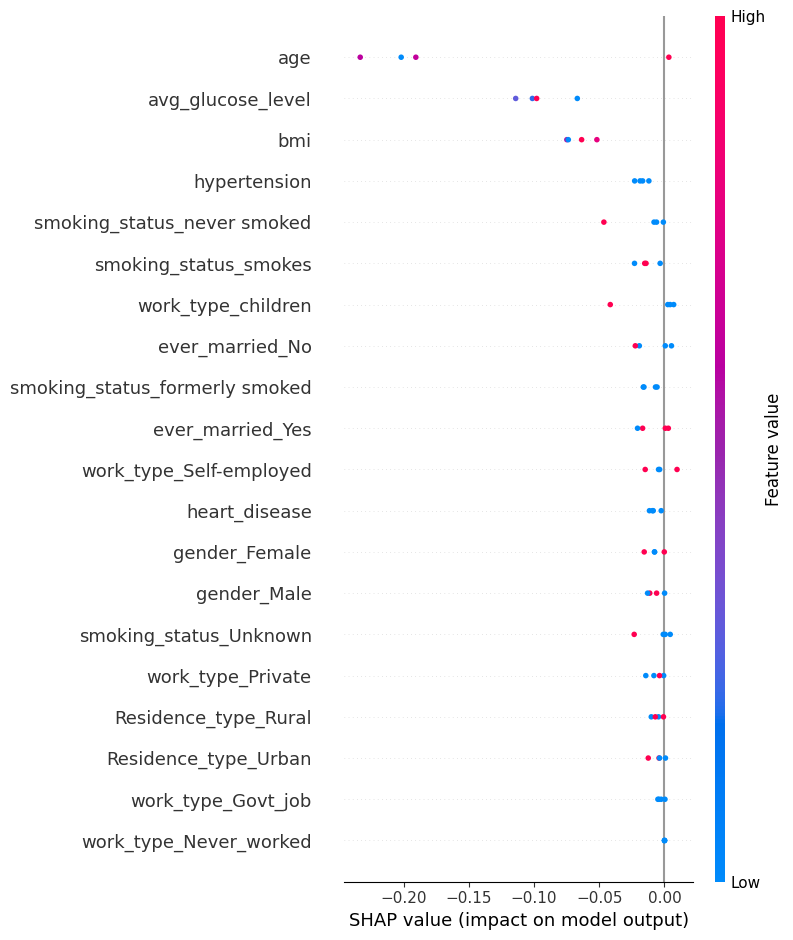

In [7]:
# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values[...,1], X_test[start_index:end_index])